<a href="https://colab.research.google.com/github/Bross-DataScience/PLN_Twitter/blob/main/PLN_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Verificar se Twitter é Racista/Sexista

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

nltk.download()

#### Ler Dados

In [133]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/Twitter/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/Twitter/test.csv')

In [134]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [135]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [136]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


#### Pré-Processamento dos Dados
#### Remover Pontuações e Catacteres Especiais

In [137]:
train['tweet'] = train['tweet'].str.lower()

In [138]:
train['tweet'] = train['tweet'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",x))

In [139]:
train['tweet'].head()

0      when a father is dysfunctional and is so sel...
1      thanks for lyft credit i cant use cause they...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
Name: tweet, dtype: object

In [140]:
def clear_text(data, col):
  """
  Tira pontuações e caracteres especiais, recebendo um dataframe (data) e uma coluna (col)
  """
  data[col] = data[col].str.lower()
  data[col] = data[col].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",x))

In [141]:
clear_text(train, 'tweet')

In [142]:
clear_text(test, 'tweet')

In [143]:
test.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...


#### Remover Palavras Comuns

In [14]:
## common_words = stopwords.words('english')

In [20]:
## len(common_words)

In [21]:
## [word for word in train['tweet'].str.split()[0] if word not in common_words]

In [144]:
def remove_common_words(data, col):
  common_words = stopwords.words('english')
  list_of_list_words = data['tweet'].str.split()
  for idx, _ in data.iterrows():
    data[col].at[idx] = [word for word in list_of_list_words[idx] if word not in common_words]

In [145]:
remove_common_words(train, 'tweet')

In [146]:
train.head()

,id,label,tweet
0,1,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, u, take, u, time, ur]"
4,5,0,"[factsguide, society, motivation]"


In [147]:
remove_common_words(test, 'tweet')

In [148]:
test.head()

,id,tweet
0,31963,"[studiolife, aislife, requires, passion, dedic..."
1,31964,"[white, supremacists, want, everyone, see, new..."
2,31965,"[safe, ways, heal, acne, altwaystoheal, health..."
3,31966,"[hp, cursed, child, book, reservations, alread..."
4,31967,"[3rd, bihday, amazing, hilarious, nephew, eli,..."


#### Remover Variações da Mesma Palavra

In [149]:
## remove_variations = WordNetLemmatizer()

In [150]:
## remove_variations.lemmatize('went', 'v')

In [151]:
def remove_variations_words(data, col):
    remove_variations = WordNetLemmatizer()
    for idx, _ in data.iterrows():
        data[col].at[idx] = [remove_variations.lemmatize(word,'v') \
                             for word in data[col][idx]]

In [152]:
remove_variations_words(train, 'tweet')

In [153]:
train['tweet'].tail(10)

31952                                            [go, far]
31953    [good, morning, instagram, shower, water, berl...
31954    [holiday, bull, dominate, bull, direct, whatev...
31955    [less, 2, weeks, ibizabringitonmallorcaholiday...
31956    [fish, tomorrow, carnt, wait, first, time, 2, ...
31957                                    [eat, isz, youuu]
31958    [see, nina, turner, airwaves, try, wrap, mantl...
31959    [listen, sad, songs, monday, morning, otw, wor...
31960    [sikh, temple, vandalise, calgary, wso, condem...
31961                                      [thank, follow]
Name: tweet, dtype: object

In [154]:
remove_variations_words(test, 'tweet')

In [155]:
test['tweet'].tail(10)

17187    [love, life, createyourfuture, lifestyle, holi...
17188    [black, professor, demonize, propose, nazi, st...
17189    [learn, think, positive, positive, instagram, ...
17190    [love, pretty, happy, fresh, teenilicious, fix...
17191    [2damntuffruffmufftechnocityng005web1997ukhxin...
17192    [think, factory, leftright, polarisation, trum...
17193    [feel, like, mermaid, hairflip, neverready, fo...
17194    [hillary, campaign, today, ohioomg, amp, use, ...
17195    [happy, work, conference, right, mindset, lead...
17196    [song, glad, free, download, shoegaze, newmusi...
Name: tweet, dtype: object

#### Engenharia de Recursos (feature Engineering)
quantidade de palavras por tweet

In [156]:
train['words'] = train['tweet'].apply(len)

In [157]:
train.head()

,id,label,tweet,words
0,1,0,"[father, dysfunctional, selfish, drag, kid, dy...",7
1,2,0,"[thank, lyft, credit, cant, use, cause, dont, ...",13
2,3,0,"[bihday, majesty]",2
3,4,0,"[model, love, u, take, u, time, ur]",7
4,5,0,"[factsguide, society, motivation]",3


In [158]:
test['words'] = test['tweet'].apply(len)

In [159]:
test.head()

,id,tweet,words
0,31963,"[studiolife, aislife, require, passion, dedica...",8
1,31964,"[white, supremacists, want, everyone, see, new...",9
2,31965,"[safe, ways, heal, acne, altwaystoheal, health...",7
3,31966,"[hp, curse, child, book, reservations, already...",10
4,31967,"[3rd, bihday, amaze, hilarious, nephew, eli, a...",11


#### Análise Exploratória de Dados (AED)
Distribuição das quantidade de palavras por 'label'

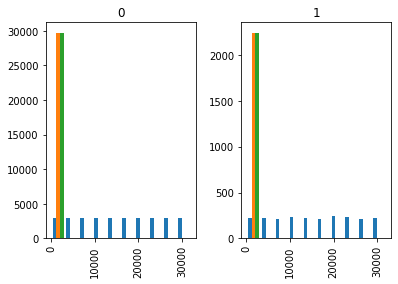

In [160]:
train.hist(column=['words'], by='label')
plt.show()

In [201]:
train.head()

,id,label,tweet,words
0,1,0,father dysfunctional selfish drag kid dysfunct...,7
1,2,0,thank lyft credit cant use cause dont offer wh...,13
2,3,0,bihday majesty,2
3,4,0,model love u take u time ur,7
4,5,0,factsguide society motivation,3


In [210]:
x = train.loc[train['label']==0]

In [212]:
y = train.loc[train['label']==1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


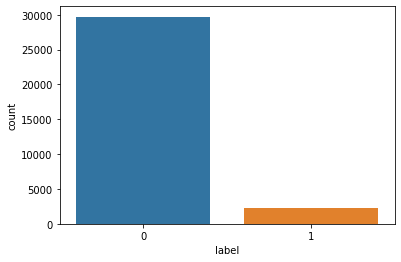

In [218]:
### Quantidade de Cada Label

sns.countplot('label', data=train)
plt.show()

#### Palavras Frequêntes 
#### Averiguar palavras mais frequêntes classificadas como "racistas ou sexistas"

In [162]:
list_of_lists = train.loc[train['label']==1]['tweet'].values
list_of_lists

array([list(['cnn', 'call', 'michigan', 'middle', 'school', 'build', 'wall', 'chant', 'tcot']),
       list(['comment', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins']),
       list(['retweet', 'agree']), ...,
       list(['dont', 'ball', 'hashtag', 'say', 'weasel', 'away', 'lumpy', 'tony', 'dipshit']),
       list(['make', 'ask', 'anybody', 'god', 'oh', 'thank', 'god']),
       list(['sikh', 'temple', 'vandalise', 'calgary', 'wso', 'condemn', 'act'])],
      dtype=object)

In [163]:
words = [word for list in list_of_lists for word in list]

In [164]:
len(words)

18596

In [165]:
import collections

In [166]:
def generate_freq_words(list):
    return collections.Counter(list)

In [167]:
freq_words = generate_freq_words(words)

In [168]:
len(freq_words)

5285

In [169]:
list_of_words = []
list_of_freq = []
for word, freq in freq_words.items():
    list_of_words.append(word)
    list_of_freq.append(freq)

In [170]:
data_freq = pd.DataFrame({'word':  list_of_words, 'frequency': list_of_freq})

In [171]:
data_freq.sort_values('frequency', ascending=False, inplace=True)

In [172]:
dict(data_freq[:10].values)

{'amp': 283,
 'black': 146,
 'libtard': 149,
 'like': 141,
 'people': 95,
 'politics': 97,
 'racist': 103,
 'say': 96,
 'trump': 216,
 'white': 153}

#### Nuvem de Palavras

In [173]:
from wordcloud import WordCloud

In [174]:
cloud = WordCloud(background_color='white')

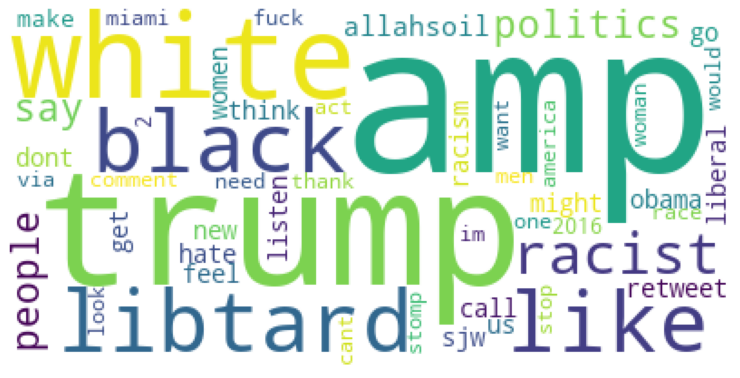

In [221]:
plt.figure(figsize=(12,6), dpi=80)
cloud.generate_from_frequencies(dict(data_freq[:50].values))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [176]:
## Retomar para formato texto
train['tweet'] = train['tweet'].apply(lambda x: ' '.join(x))

In [177]:
test['tweet'] = test['tweet'].apply(lambda x: ' '.join(x))

In [178]:
## Solucionar problema de desequilibrio dos dados
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [179]:
from sklearn.utils import resample

In [60]:
## train_minority = train.loc[train['label']==1]

In [61]:
## train_majority = train.loc[train['label']==0]

In [180]:
## função que equilibra os dados tanto do [maior_para_menor] quanto [menor_para_maior]
def balanced_data(train, for_more=True):
  train_minority = train.loc[train['label']==1]
  train_majority = train.loc[train['label']==0]
  if for_more:
    smaller_to_larger = resample(train_minority, 
                             replace=True, 
                             n_samples=len(train_majority), 
                             random_state=123)
    train_balanced = pd.concat([smaller_to_larger, train_majority])
  else:
    larger_to_smaller = resample(train_majority, 
                            replace=True, 
                            n_samples=len(train_minority), 
                            random_state=123)
    train_balanced = pd.concat([larger_to_smaller, train_minority])
  return train_balanced

In [181]:
len(train_balanced)

4484

In [182]:
train_balanced = balanced_data(train, for_more=False)

In [183]:
len(train_balanced)

4484

In [184]:
train_balanced['label'].value_counts()

1    2242
0    2242
Name: label, dtype: int64

#### Treinar Modelo

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X = train_balanced['tweet']
y = train_balanced['label']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [188]:
X_train.shape, y_train.shape ## dados para treino

((3138,), (3138,))

In [189]:
X_test.shape, y_test.shape ## dados para avaliar performance

((1346,), (1346,))

In [190]:
sgd = Pipeline([
    ('countVector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('modelo', SGDClassifier())
])

In [191]:
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('countVector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabul...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000,

In [192]:
sgd_pred = sgd.predict(X_test)

In [193]:
sgd_pred

array([0, 0, 0, ..., 0, 0, 1])

#### Avaliar Performance do Modelo

In [194]:
from sklearn.metrics import f1_score

In [195]:
sgd_score = f1_score(y_test, sgd_pred)

In [196]:
sgd_score

0.8436308161708619

In [197]:
y_pred = sgd.predict(test['tweet'])
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [198]:
submission = pd.DataFrame({'id': test['id'], 'label': y_pred})

In [199]:
submission

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,1
17195,49158,0
